# Credit Card Fraud Detection

**Description:- 
In this project related to the detection of credit card fraud.
I have used Python language to write code.
I have visualized data in the form of Heat Map.
I have applied Logistic Regression Algorithm for classification.**

In [1]:
#these are the imports needed in code.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import gridspec

In [3]:
#here i have created a dataframe in pandas named data and then load it with the csv file which i downloaded from kaggle.
data  = pd.read_csv("D:/EBooks/codeclause/creditcard.zip")

In [4]:
data.head()        #head() is used to get quick idea and structure if our data.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(data.shape)        #this displays the actual size of our data

(284807, 31)


In [6]:
print(data.describe())        #description of data

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

**Now we will try to separate the original dataset into two separate datasets based on the target variable 'Class'.**

**The first we create a new dataframe called 'fraud' that contains all the rows from the original dataframe 'data' where the 'Class' column has a value of 1. This new dataframe will only contain records of fraudulent transactions.**

**The second we create a new dataframe called 'valid' that contains all the rows from the original dataframe 'data' where the 'Class' column has a value of 0. This new dataframe will only contain records of valid (non-fraudulent) transactions.**

In [7]:
fraud = data[data['Class']==1]    
valid = data[data['Class']==0]

In [8]:
fraction = print(len(fraud)/float(len(valid)))        #finding fraction of fraud cases

0.0017304750013189597


In [9]:
print("Fraud Cases= {}".format(len(data[data['Class']==1])))        #printing number of fraud cases found

Fraud Cases= 492


In [10]:
print("Valid Cases= {}".format(len(data[data['Class']==0])))        #printing number of valid cases found

Valid Cases= 284315


In [11]:
fraud.Amount.describe()        #shows full discription of fraud 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
valid.Amount.describe()        #shows full discription of valid

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**Now we will visualize the data in the form of heat chart**

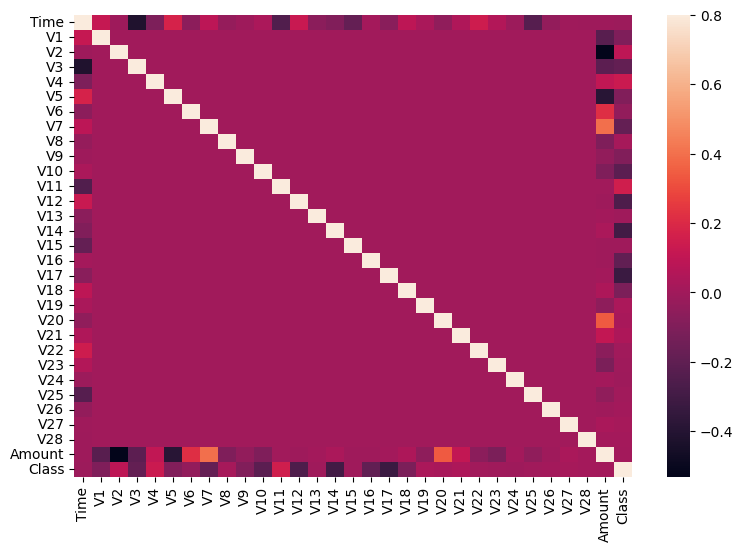

In [13]:
figmatrix = data.corr()
fig = plt.figure(figsize=(9,6))
sns.heatmap(figmatrix, vmax=0.8)
plt.show()

In [14]:
x =data.drop(['Class'],axis=1)
y = data['Class']
x.shape 
y.shape

(284807,)

**Now we will use Logistic Regression Algorithm to solve the problem.**

In [15]:
xData = x.values
yData = y.values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
xTrain ,xTest ,yTrain, yTest = train_test_split(xData,yData,test_size=0.2,random_state=42)        

In [17]:
# Initialize a Logistic Regression classifier
clf = LogisticRegression(max_iter=1000)

In [18]:
# Fit the classifier on the training data
clf.fit(xTrain, yTrain)

# Predict on the testing data
yPred = clf.predict(xTest)

In [19]:
from sklearn.metrics import accuracy_score

#finding accuracy.
print("Accuracy:", accuracy_score(yTest, yPred))

Accuracy: 0.9989291106351603
